In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/FORMULAPARFUM - Copy.csv'
df = pd.read_csv(file_path)


In [ ]:
df = pd.read_csv(file_path, delimiter=';')
df.head()

,VARIAN NAME,FRAGRANT,FORMULA,AQUADEST,ALKOHOL,GENDER,JENIS,UKURAN,HARGA
0,BONJOUR ABSOLUTE,UNIVERS,20.78,5.0,74.22,CEWE,EDT,100.0,200000
1,BONJOUR AMBRE,SWEET BABY,12.69,5.0,82.31,CEWE,EDT,30.0,149400
2,BONJOUR Aqua,WINNER,8.20,5.0,86.80,CEWE,EDT,50.0,178900
3,BONJOUR Aqua,TARINA,5.10,5.0,89.90,COWO,EDT,100.0,200000
4,BONJOUR BACK IN RED,ROUGH BACCA,15.63,10.0,74.37,CEWE,EDP,100.0,200000


In [ ]:
X = df.drop(['VARIAN NAME', 'FRAGRANT', 'GENDER', 'JENIS'], axis=1)

In [ ]:
print(X)

     FORMULA  AQUADEST  ALKOHOL  UKURAN   HARGA
0      20.78       5.0    74.22   100.0  200000
1      12.69       5.0    82.31    30.0  149400
2       8.20       5.0    86.80    50.0  178900
3       5.10       5.0    89.90   100.0  200000
4      15.63      10.0    74.37   100.0  200000
..       ...       ...      ...     ...     ...
245     8.10       5.0    86.90   100.0  200000
246     7.80      10.0    82.20    50.0  176400
247     6.67       5.0    88.33    50.0  177800
248    17.65       5.0    77.35    50.0  186000
249     5.08      10.0    84.92   250.0  200000

[250 rows x 5 columns]


In [ ]:
X['HARGA'].fillna(X['HARGA'].median(), inplace=True)

<ipython-input-7-54aa3d1086fc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['HARGA'].fillna(X['HARGA'].median(), inplace=True)


In [ ]:
print(X)

     FORMULA  AQUADEST  ALKOHOL  UKURAN   HARGA
0      20.78       5.0    74.22   100.0  200000
1      12.69       5.0    82.31    30.0  149400
2       8.20       5.0    86.80    50.0  178900
3       5.10       5.0    89.90   100.0  200000
4      15.63      10.0    74.37   100.0  200000
..       ...       ...      ...     ...     ...
245     8.10       5.0    86.90   100.0  200000
246     7.80      10.0    82.20    50.0  176400
247     6.67       5.0    88.33    50.0  177800
248    17.65       5.0    77.35    50.0  186000
249     5.08      10.0    84.92   250.0  200000

[250 rows x 5 columns]


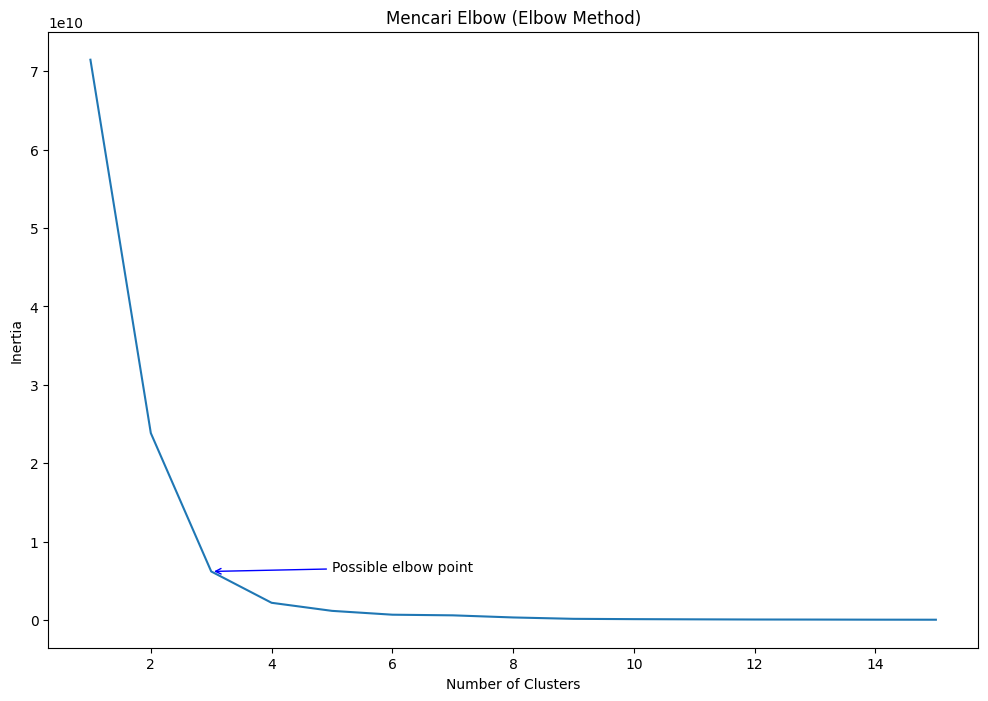

In [ ]:
# Initializing an empty list to store inertia values
clusters = []

# Calculating inertia for different numbers of clusters (from 1 to 16)
for i in range(1, 16):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

# Plotting the elbow chart after collecting all inertia values
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 16)), y=clusters, ax=ax)

# Setting chart title and labels
ax.set_title('Mencari Elbow (Elbow Method)')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')

# Adjusting the annotation for better readability
ax.annotate(
    'Possible elbow point',
    xy=(3, clusters[2]),  # Positioning at the 3rd cluster point
    xytext=(5, clusters[2] + 0.5),  # Adjusted position for visibility
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue')
)

# Displaying the plot
plt.show()

In [ ]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

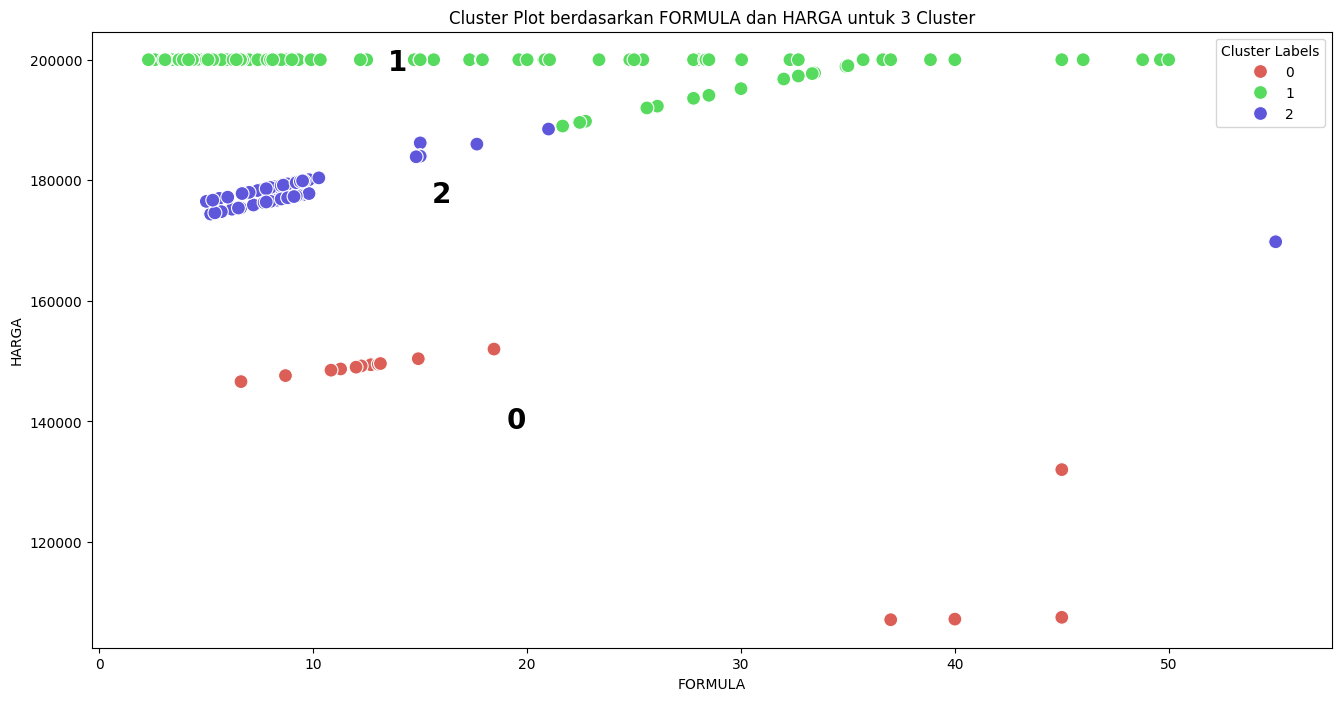

In [ ]:
# Menentukan jumlah cluster
n_clusters = 3

# Iterasi untuk memastikan konsistensi
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
X['Labels'] = kmeans.fit_predict(X[['FORMULA', 'HARGA']])

# Visualisasi Cluster Plot
plt.figure(figsize=(16, 8))
sns.scatterplot(x=X['FORMULA'], y=X['HARGA'], hue=X['Labels'], palette=sns.color_palette('hls', n_clusters), s=100)

# Menambahkan anotasi pada setiap kluster
for label in X['Labels'].unique():
    plt.annotate(
        label,
        (X[X['Labels'] == label]['FORMULA'].mean(), X[X['Labels'] == label]['HARGA'].mean()),
        horizontalalignment='center',
        verticalalignment='center',
        size=20, weight='bold', color='black'
    )

plt.title(f"Cluster Plot berdasarkan FORMULA dan HARGA untuk {n_clusters} Cluster")
plt.xlabel("FORMULA")
plt.ylabel("HARGA")
plt.legend(title='Cluster Labels')
plt.show()

In [ ]:
print(X)

     FORMULA  AQUADEST  ALKOHOL  UKURAN   HARGA  Labels
0      20.78       5.0    74.22   100.0  200000       1
1      12.69       5.0    82.31    30.0  149400       0
2       8.20       5.0    86.80    50.0  178900       2
3       5.10       5.0    89.90   100.0  200000       1
4      15.63      10.0    74.37   100.0  200000       1
..       ...       ...      ...     ...     ...     ...
245     8.10       5.0    86.90   100.0  200000       1
246     7.80      10.0    82.20    50.0  176400       2
247     6.67       5.0    88.33    50.0  177800       2
248    17.65       5.0    77.35    50.0  186000       2
249     5.08      10.0    84.92   250.0  200000       1

[250 rows x 6 columns]


In [ ]:
X.to_excel("Output_Cluster.xlsx")